In [5]:
# notebooks/faa_enforcement_analysis.ipynb

# Cell 1: Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Cell 2: Load Cleaned Data
df = pd.read_csv("../data/processed/faa_enforcement_final_cleaned.csv", parse_dates=["DATE KNOWN", "CLOSED DATE"])
df.head()



,CASE NUMBER,NAME,ENTITY TYPE,DATE KNOWN,ACTION,SANCTION AMOUNT,SANCTION,CASE TYPE,CLOSED DATE
0,2008GL070135,CRUCIAL AIR SUPPORT LLC,APPROVD REPAIR STA,2008-09-22,ORD ASSESS CIVIL PENALTY,1000.0,DOLLARS,MAINTENANCE,2010-01-04
1,2007WP190107,PRIMARIS AIRLINES INC,A/C or COMM OPER,2007-07-10,ORD ASSESS CIVIL PENALTY,NaN,SANCTION WAIVED,RECORDS/RPTS,2010-01-04
2,2006WP700166,MESA AIRLINES INC,A/C or COMM OPER,2006-06-19,ORD ASSESS CP HMT,55000.0,DOLLARS,HAZ MAT,2010-01-05
3,2007WP700017,MESA AIRLINES INC,A/C or COMM OPER,2006-10-18,ORD ASSESS CP HMT,60000.0,DOLLARS,HAZ MAT,2010-01-05
4,2008SO950034,PACIFIC WINGS L L C,A/C or COMM OPER,2007-10-31,ORD ASSESS CIVIL PENALTY,10000.0,DOLLARS,DRUG TESTING,2010-01-07


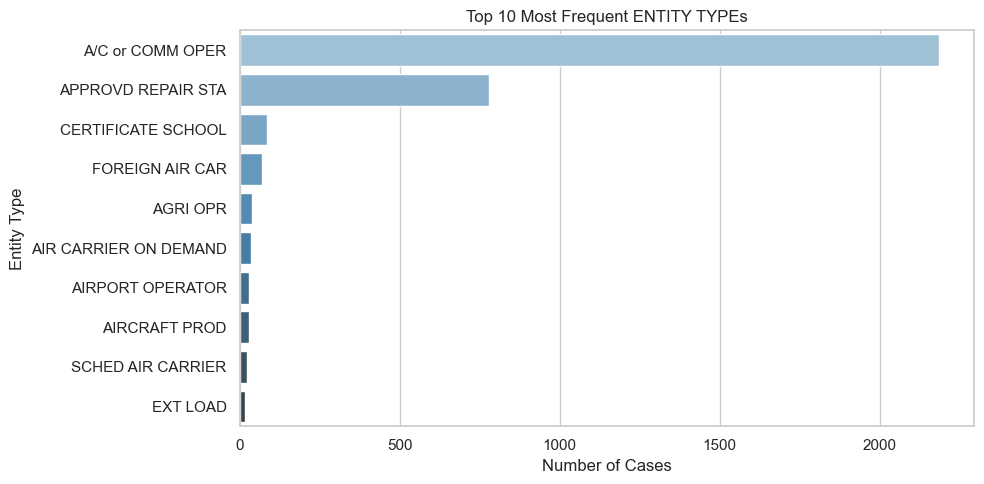

In [ ]:
# Configure display and plot styles
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")



# Top 10 Most Frequent ENTITY TYPEs
entity_counts = df["ENTITY TYPE"].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=entity_counts.values, y=entity_counts.index, palette="Blues_d")
plt.title("Top 10 Most Frequent ENTITY TYPEs")
plt.xlabel("Number of Cases")
plt.ylabel("Entity Type")
plt.tight_layout()
plt.show()





c:\Users\dcuon\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\dcuon\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


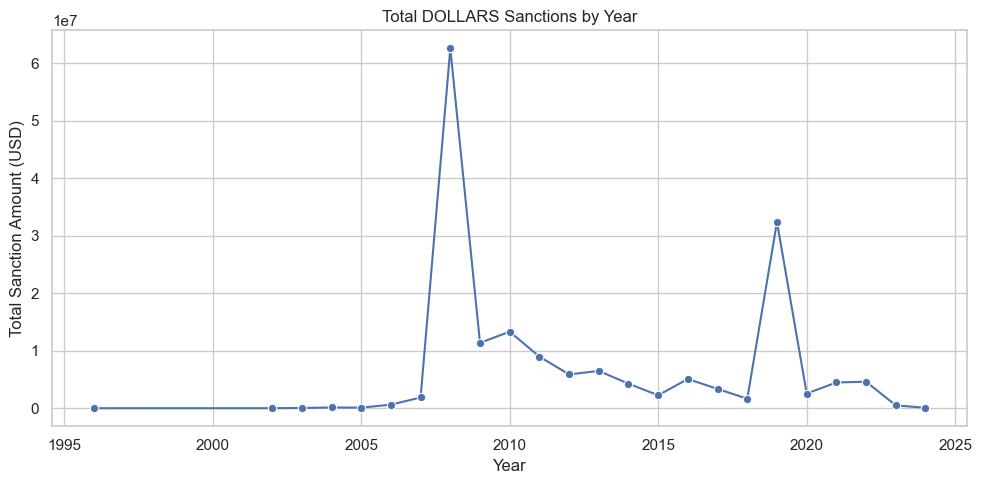

In [7]:
# Cell 4: Total Sanctions (DOLLARS only) per Year
df["YEAR KNOWN"] = df["DATE KNOWN"].dt.year
dollar_cases = df[df["SANCTION"] == "DOLLARS"]
annual_fines = dollar_cases.groupby("YEAR KNOWN")["SANCTION AMOUNT"].sum()

plt.figure(figsize=(10, 5))
sns.lineplot(x=annual_fines.index, y=annual_fines.values, marker="o")
plt.title("Total DOLLARS Sanctions by Year")
plt.xlabel("Year")
plt.ylabel("Total Sanction Amount (USD)")
plt.tight_layout()
plt.show()


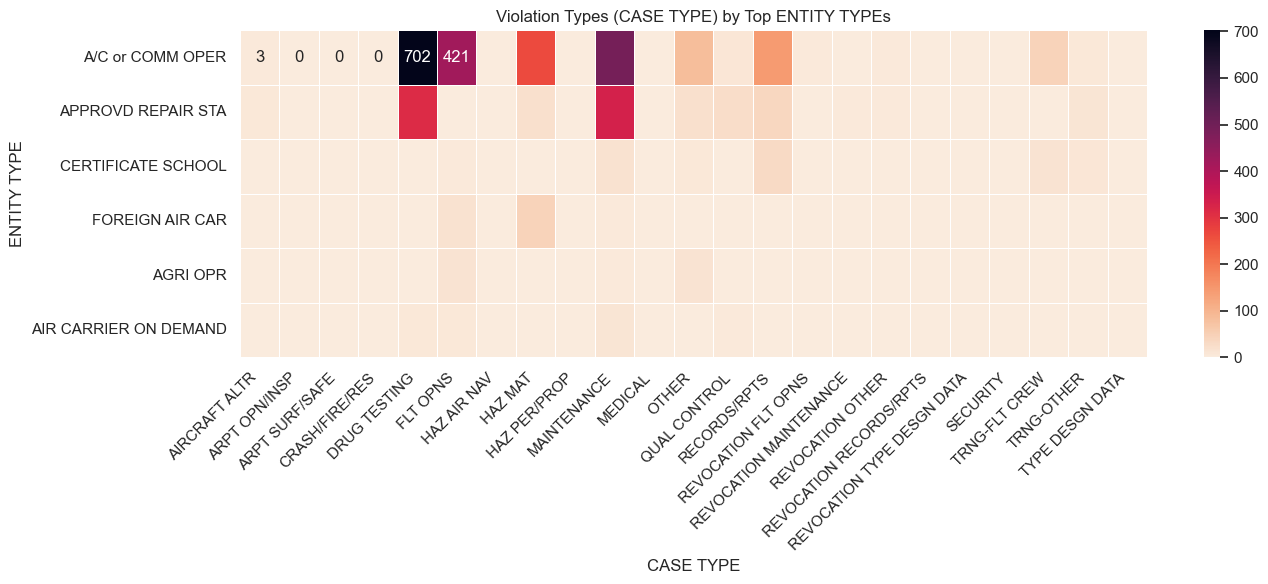

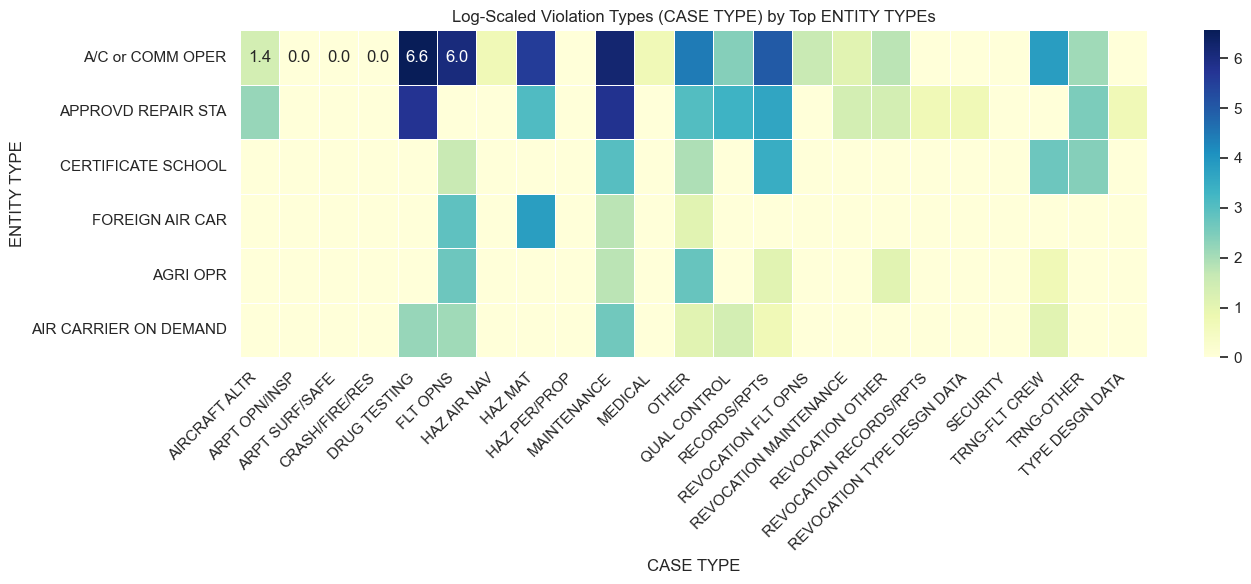

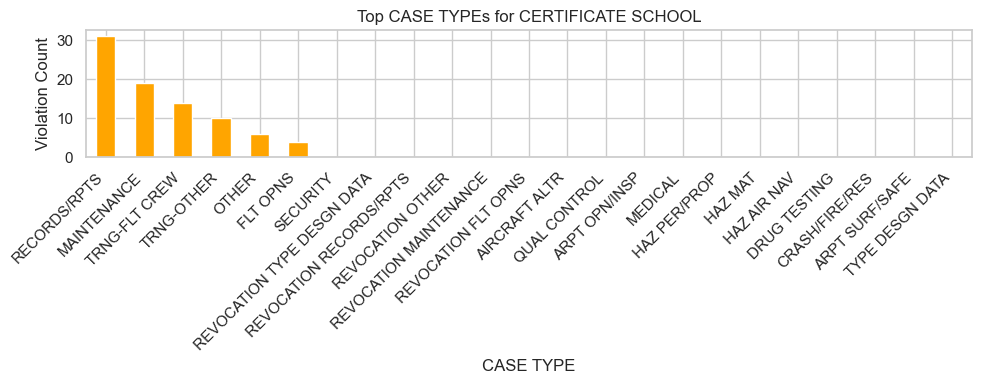

In [15]:
# Cell 5: Common Violation (CASE TYPE) by ENTITY TYPE
pivot = df.pivot_table(index="ENTITY TYPE", columns="CASE TYPE", aggfunc="size", fill_value=0)
top_entities = df["ENTITY TYPE"].value_counts().head(6).index
subset = pivot.loc[top_entities]

plt.figure(figsize=(14, 6))
sns.heatmap(subset, annot=True, fmt="d", cmap="rocket_r", linewidths=0.5)
plt.title("Violation Types (CASE TYPE) by Top ENTITY TYPEs")
plt.xlabel("CASE TYPE")
plt.ylabel("ENTITY TYPE")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()



#  Log scale to handle skew
import numpy as np
log_subset = np.log1p(subset)  # log(1 + x) to avoid log(0)

plt.figure(figsize=(14, 6))
sns.heatmap(log_subset, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=0.5)
plt.title("Log-Scaled Violation Types (CASE TYPE) by Top ENTITY TYPEs")
plt.xlabel("CASE TYPE")
plt.ylabel("ENTITY TYPE")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


# Zoom in on a single entity type
focus_entity = "CERTIFICATE SCHOOL"  # Change as needed
if focus_entity in subset.index:
    subset.loc[focus_entity].sort_values(ascending=False).plot(
        kind="bar", color="orange", figsize=(10, 4)
    )
    plt.title(f"Top CASE TYPEs for {focus_entity}")
    plt.xlabel("CASE TYPE")
    plt.ylabel("Violation Count")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()
else:
    print(f"'{focus_entity}' not found in subset.")


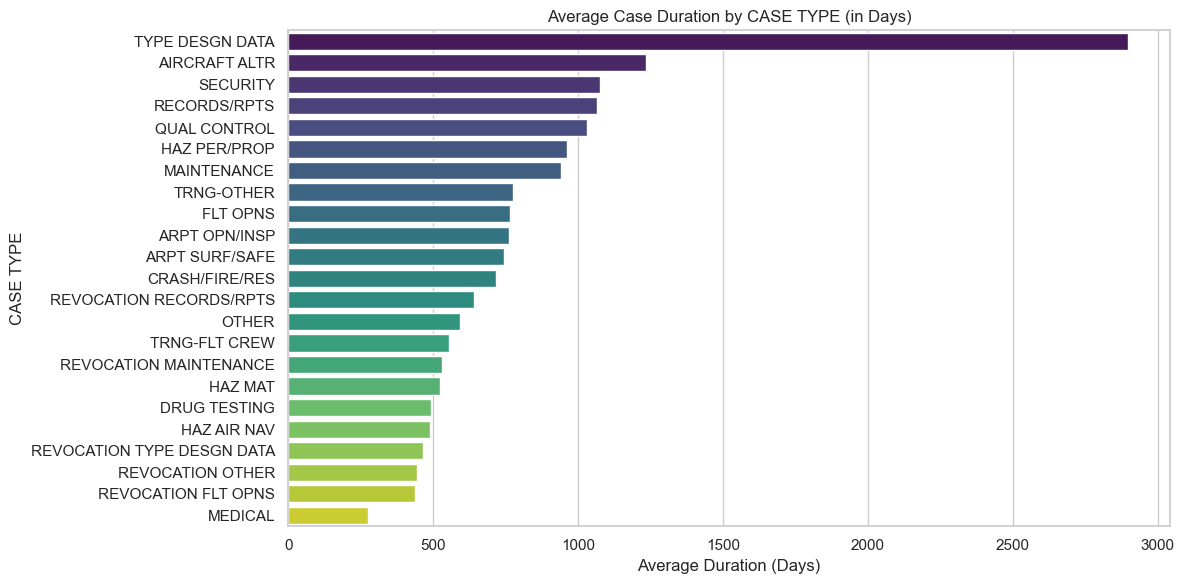

In [16]:
# Cell 6: Average Case Duration (Closed - Known)
df["DURATION DAYS"] = (df["CLOSED DATE"] - df["DATE KNOWN"]).dt.days
duration_by_type = df.groupby("CASE TYPE")["DURATION DAYS"].mean().sort_values(ascending=False).dropna()

plt.figure(figsize=(12, 6))
sns.barplot(x=duration_by_type.values, y=duration_by_type.index, palette="viridis")
plt.title("Average Case Duration by CASE TYPE (in Days)")
plt.xlabel("Average Duration (Days)")
plt.ylabel("CASE TYPE")
plt.tight_layout()
plt.show()

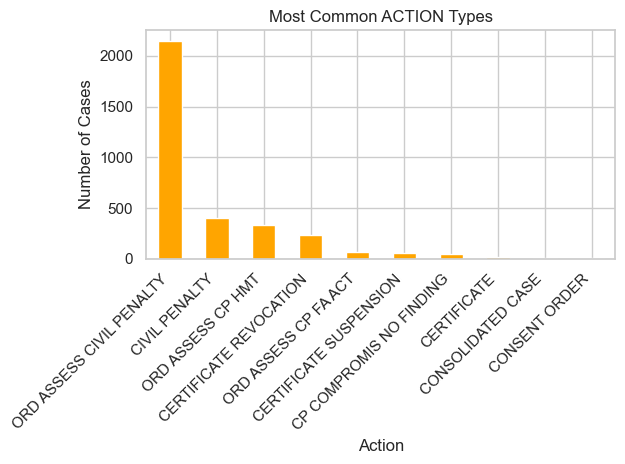

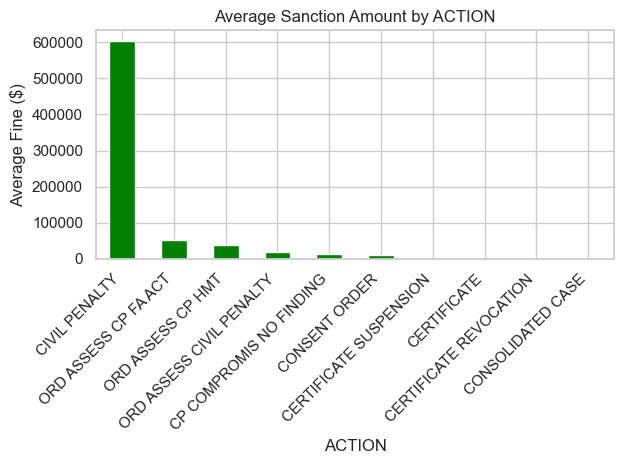

In [18]:
# Frequency
df["ACTION"].value_counts().head(10).plot(kind="bar", color="orange")
plt.title("Most Common ACTION Types")
plt.xlabel("Action")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Average sanction by ACTION
avg_cost_by_action = df.groupby("ACTION")["SANCTION AMOUNT"].mean().sort_values(ascending=False).head(10)
avg_cost_by_action.plot(kind="bar", color="green")
plt.title("Average Sanction Amount by ACTION")
plt.ylabel("Average Fine ($)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


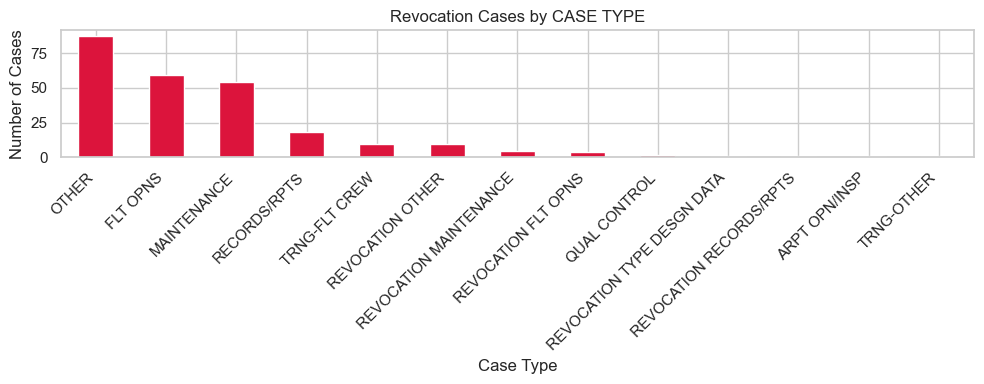

C:\Users\dcuon\AppData\Local\Temp\ipykernel_14020\4187154572.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revocation_df["YEAR"] = pd.to_datetime(revocation_df["CLOSED DATE"], errors="coerce").dt.year


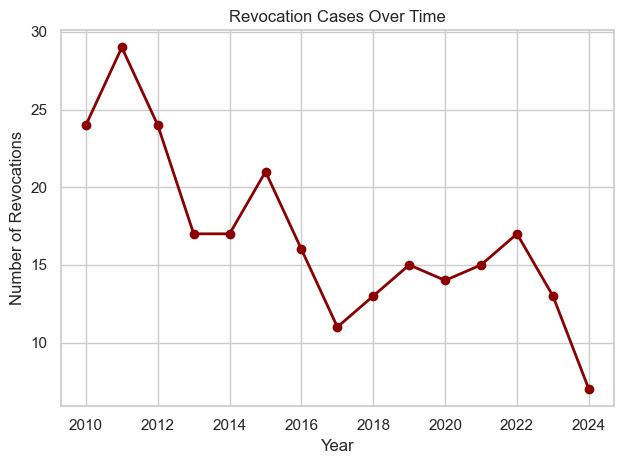

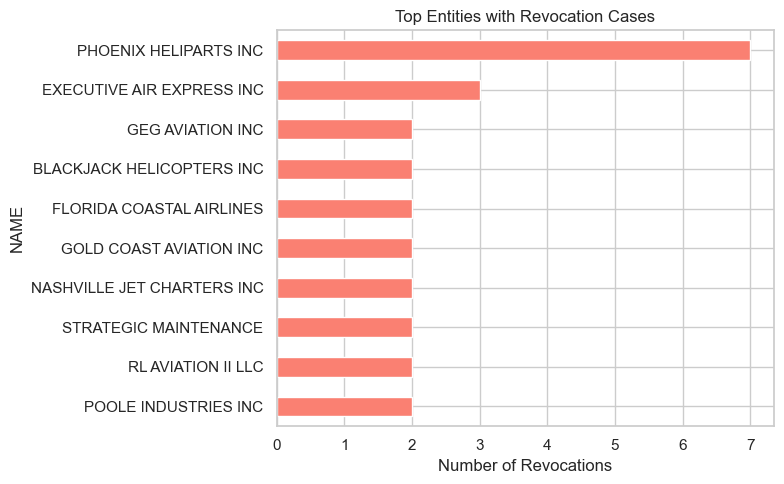

In [ ]:
revocation_df = df[
    df["ACTION"].str.contains("REVOCATION", na=False)
    | df["SANCTION"].str.contains("REVOCATION", na=False)
]

revocation_by_type = revocation_df["CASE TYPE"].value_counts()

revocation_by_type.plot(kind="bar", color="crimson", figsize=(10, 4))
plt.title("Revocation Cases by CASE TYPE")
plt.ylabel("Number of Cases")
plt.xlabel("Case Type")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()



revocation_df["YEAR"] = pd.to_datetime(revocation_df["CLOSED DATE"], errors="coerce").dt.year
revocation_by_year = revocation_df["YEAR"].value_counts().sort_index()

revocation_by_year.plot(kind="line", marker="o", color="darkred", linewidth=2)
plt.title("Revocation Cases Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Revocations")
plt.grid(True)
plt.tight_layout()
plt.show()


top_revoked_entities = revocation_df["NAME"].value_counts().head(10)
top_revoked_entities.plot(kind="barh", color="salmon", figsize=(8, 5))
plt.title("Top Entities with Revocation Cases")
plt.xlabel("Number of Revocations")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


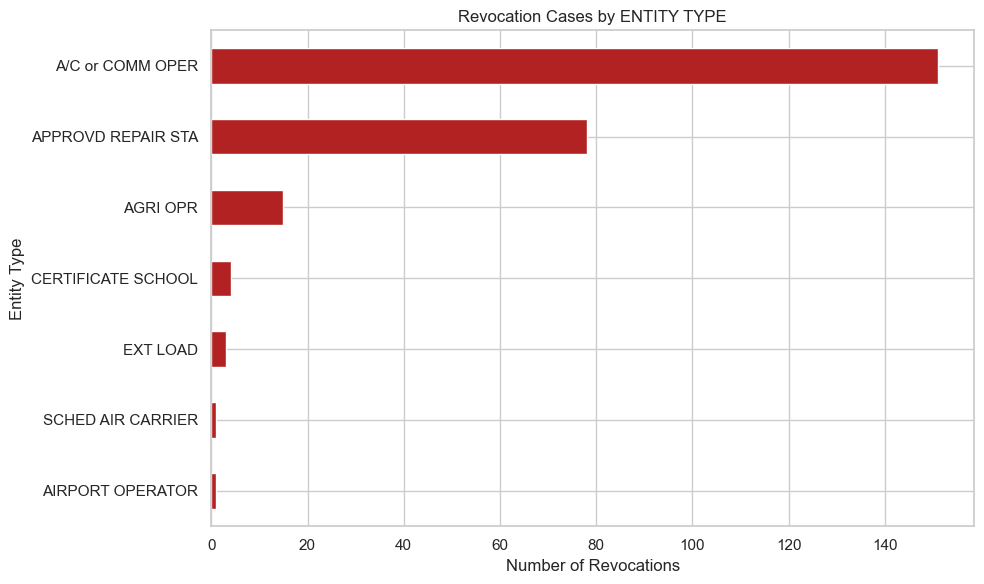

In [20]:
# Filter all revocation-related rows
revocation_df = df[
    df["ACTION"].str.contains("REVOCATION", na=False)
    | df["SANCTION"].str.contains("REVOCATION", na=False)
]

# Group by ENTITY TYPE
revocation_by_entity = revocation_df["ENTITY TYPE"].value_counts().sort_values(ascending=True)

# Plot
plt.figure(figsize=(10, 6))
revocation_by_entity.plot(kind="barh", color="firebrick")
plt.title("Revocation Cases by ENTITY TYPE")
plt.xlabel("Number of Revocations")
plt.ylabel("Entity Type")
plt.tight_layout()
plt.show()


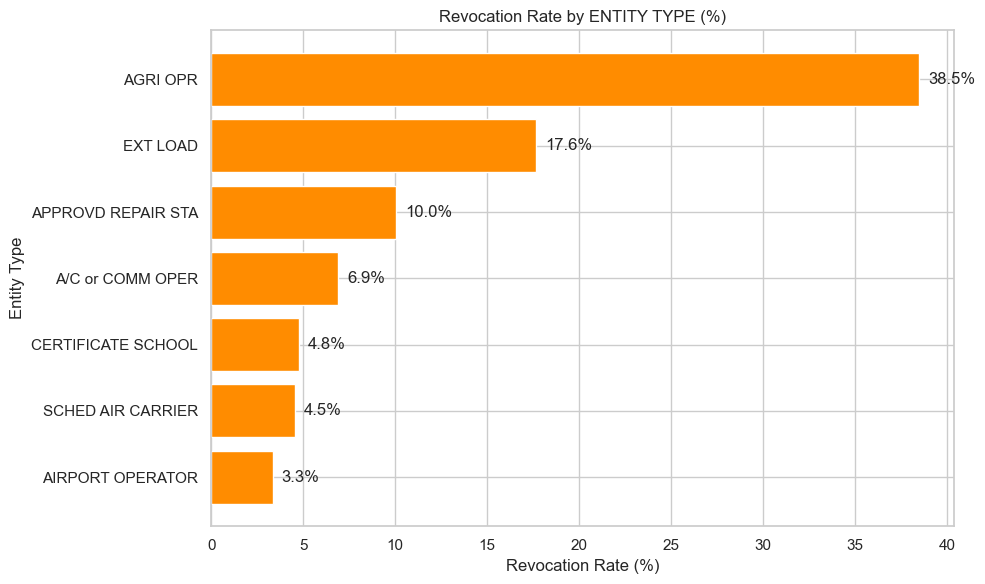

In [ ]:
plt.figure(figsize=(10, 6))
sorted_revocation_rate = revocation_rate.sort_values(ascending=False)

bars = plt.barh(
    sorted_revocation_rate.index[::-1],  # reverse for highest on top
    sorted_revocation_rate.values[::-1],
    color="darkorange"
)

# Add annotations (percentages) to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 0.5,  # position a bit to the right of bar
        bar.get_y() + bar.get_height() / 2,
        f"{width:.1f}%",
        va="center"
    )

plt.title("Revocation Rate by ENTITY TYPE (%)")
plt.xlabel("Revocation Rate (%)")
plt.ylabel("Entity Type")
plt.tight_layout()
plt.show()
"""
You’ll be able to answer: “Which entity types are most likely to receive a revocation when they are involved in an enforcement case?”

Even a smaller category like CERTIFICATE SCHOOL might have a high revocation rate — that’s a red flag worth surfacing.
"""

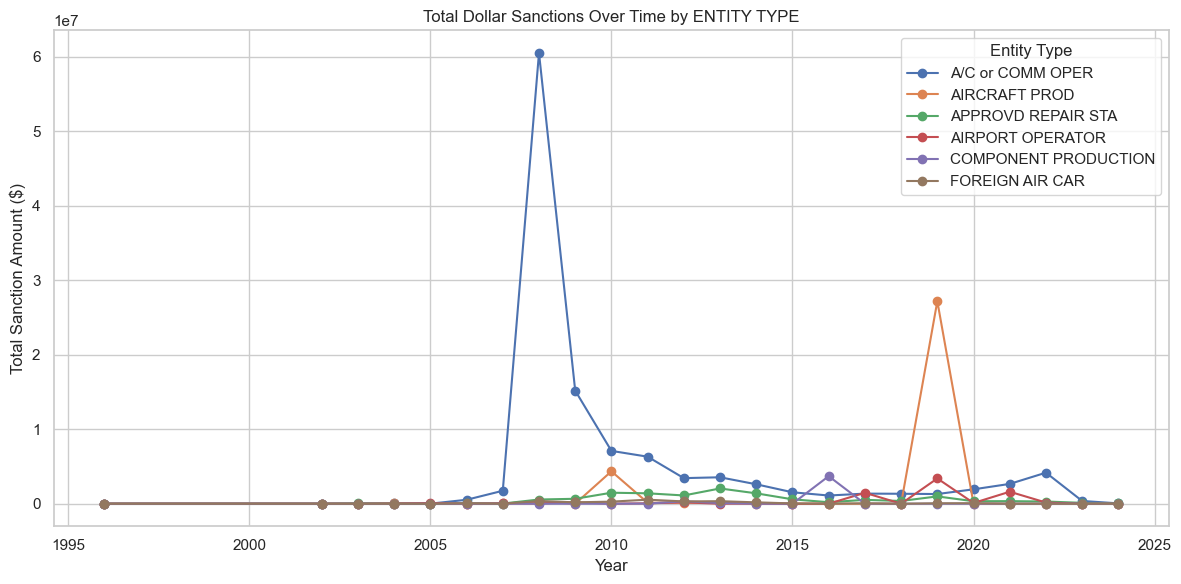

In [ ]:
# Ensure DATE KNOWN is datetime (if not already)
df["DATE KNOWN"] = pd.to_datetime(df["DATE KNOWN"], errors="coerce")

# Extract year
df["YEAR"] = df["DATE KNOWN"].dt.year

# Group by YEAR and ENTITY TYPE, then sum SANCTION AMOUNT
dollar_trends = df.groupby(["YEAR", "ENTITY TYPE"])["SANCTION AMOUNT"].sum().unstack(fill_value=0)

# (Optional) focus on top 6 highest overall dollar entities
top_entities_by_dollars = dollar_trends.sum().sort_values(ascending=False).head(6).index
dollar_trends = dollar_trends[top_entities_by_dollars]

# Plot
plt.figure(figsize=(12, 6))
for entity in dollar_trends.columns:
    plt.plot(dollar_trends.index, dollar_trends[entity], marker="o", label=entity)

plt.title("Total Dollar Sanctions Over Time by ENTITY TYPE")
plt.xlabel("Year")
plt.ylabel("Total Sanction Amount ($)")
plt.legend(title="Entity Type")
plt.grid(True)
plt.tight_layout()
plt.show()

'''Identify which entity types are hit hardest with dollar penalties

Detect trends (e.g., increasing fines against a specific operator type)

Showcase long-term risk exposure patterns
The percentage of revocations within each entity type

Bars sorted with the highest on top

Percent labels at the end of each bar
 '''


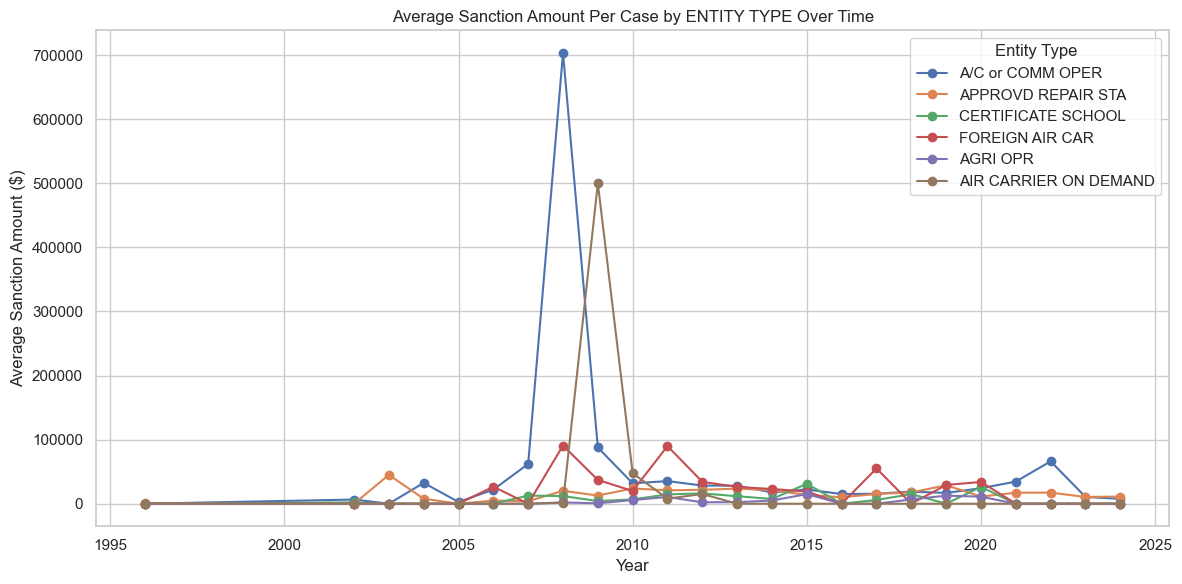

In [ ]:
# Reuse YEAR column if it already exists, or create it again
df["YEAR"] = pd.to_datetime(df["DATE KNOWN"], errors="coerce").dt.year

# Filter rows with non-null SANCTION AMOUNT
df_with_dollars = df[df["SANCTION AMOUNT"].notna()]

# Group and compute average
avg_dollar_trends = df_with_dollars.groupby(["YEAR", "ENTITY TYPE"])["SANCTION AMOUNT"].mean().unstack(fill_value=0)

# (Optional) limit to top 6 by total count of cases
top_entities_by_count = df["ENTITY TYPE"].value_counts().head(6).index
avg_dollar_trends = avg_dollar_trends[top_entities_by_count]

# Plot
plt.figure(figsize=(12, 6))
for entity in avg_dollar_trends.columns:
    plt.plot(avg_dollar_trends.index, avg_dollar_trends[entity], marker="o", label=entity)

plt.title("Average Sanction Amount Per Case by ENTITY TYPE Over Time")
plt.xlabel("Year")
plt.ylabel("Average Sanction Amount ($)")
plt.legend(title="Entity Type")
plt.grid(True)
plt.tight_layout()
plt.show()
'''
Whether certain entity types are penalized more severely on average
How sanction severity changes over the years even if total fines don't spike
Which categories might have fewer cases but higher average penalties
'''
